In [1]:
import sys
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import datetime
from tqdm import tqdm
import GPy
from collections import defaultdict
from pathlib import Path
import seaborn as sns
import scipy.stats as stats
from matplotlib.colors import ListedColormap
import warnings
import time
from itertools import product
from joblib import Parallel, delayed
from operator import itemgetter
import sncosmo

mpl.rcParams['legend.frameon'] = False
mpl.rcParams['figure.autolayout'] = True
# mpl.rcParams['figure.dpi'] = 300
# mpl.rcParams['axes.spines.right'] = False
# mpl.rcParams['axes.spines.top'] = False


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


def utkarshGrid():
    plt.minorticks_on()
    plt.grid(color='grey',
             which='minor',
             linestyle=":",
             linewidth='0.1',
             )
    plt.grid(color='black',
             which='major',
             linestyle=":",
             linewidth='0.1',
             )

In [2]:
path = os.path.dirname(os.getcwd())
os.chdir(path)
from Emulator.Classes.AllData import AllData
from Emulator.Classes.LightCurve import utkarshGrid, LightCurve
from Emulator.Classes.GP import GP
from Emulator.Classes.GP2D import GP2D
from Emulator.Classes.GP5D import GP5D
os.chdir(os.getcwd() + "/Emulator")
os.getcwd()

'/Users/utkarsh/PycharmProjects/KilonovaeLightCurves/Emulator'

In [3]:
curr_wv = np.arange(100, 3600, 10)
set_n_comp = 10
set_skip_factor = None

In [4]:
# gp = GP5D("Classes/reference.csv")
# gp.skip_factor = set_skip_factor
# gp.set_wv_range(curr_wv)
# gp.n_comp = set_n_comp
# gp.num_pca_components = (4,4)
# time_shape = None
# gp.setXY()
# # gp.save_pca_components(skip_factor = None)
# gp.save_trained_data()
# gp.ComputeDifferenceFlux()
# gp.plot_difference_histogram(binning = 150)
# plt.title("Error in only PCA Components (PCA Flux - Truth)/TRUTH")
# plt.xlabel("Units Log Flux (Error)")
# plt.ylabel("Count")
# plt.xlim(-1, 1)
# plt.show()

In [5]:
gp = GP5D("Classes/reference.csv")
gp.set_wv_range(curr_wv)
gp.n_comp = set_n_comp
time_shape = None
gp.num_pca_components = (10,10)
# gp.save_training_data(time_trauncation = time_shape) # Which wv do you want to extract.  
gp.save_pca_components(skip_factor = set_skip_factor)
gp.setXY()
fitting_kernel = GPy.kern.RBF(input_dim=4, variance = 10, lengthscale=10, ARD = True)
decay_kernel = GPy.kern.Linear(4 , ARD=True)
gp.kernel = fitting_kernel * decay_kernel
gp.model = GPy.models.GPRegression(gp.X,gp.Y,gp.kernel)
t0 = time.time()
print(f"[STATUS] Optimizing...")
gp.model.optimize_restarts(parallel = True, robust = True, num_restarts = 20)
print(f"[STATUS] {round(time.time() - t0, 2)}s taken to optimize.")
# gp.model.optimize(messages = True)
# display(gp.model.rbf.lengthscale)
display(gp.model.mul.rbf.lengthscale)
t1 = time.time()
gp.model_predict(include_like = False)
print(f"[STATUS] {round(time.time() - t1, 2)}s taken to predict.")
t2 = time.time()
gp.save_trained_data()
print(f"[STATUS] {round(time.time() - t2, 2)}s taken to save data.")
# gp.ComputeDifferenceFlux()
# gp.plot_difference_histogram(binning = 150)
# plt.xlim(-1,1)
# plt.show()

[STATUS] Setting X, Y components for 5D Model.
[STATUS] Optimizing...
Optimization restart 1/20, f = 42220.10069208783
Optimization restart 2/20, f = 42220.101203263985
Optimization restart 3/20, f = 42220.10091300507
Optimization restart 4/20, f = 42350.49446389968
Optimization restart 5/20, f = 42220.10077555377
Optimization restart 6/20, f = 42220.10068541762
Optimization restart 7/20, f = 42220.10068300959
Optimization restart 8/20, f = 42543.59813362358
Optimization restart 9/20, f = 42220.100736357046
Optimization restart 10/20, f = 42479.12253850802
Optimization restart 11/20, f = 42220.10078097228
Optimization restart 12/20, f = 42220.100967754996
Optimization restart 13/20, f = 42220.1006910397
Optimization restart 14/20, f = 42726.107820846744
Optimization restart 15/20, f = 42220.10068959203
Optimization restart 16/20, f = 42543.59994164092
Optimization restart 17/20, f = 42546.36133101218
Optimization restart 18/20, f = 42220.10071918503
Optimization restart 19/20, f = 4254

index,GP_regression.mul.rbf.lengthscale,constraints,priors
[0],0.17795993,+ve,
[1],0.14007656,+ve,
[2],0.15429383,+ve,
[3],2.04104609,+ve,


[STATUS] Predicting X and Y with trained emulator.
[STATUS] 1.93s taken to predict.
[STATUS] 64.77s taken to save data.


=== Flux Estimation === 
mejdyn: 0.001
mejwind: 0.01        
phi: 45
viewing_angle: 4
wavelength: 250nm        
time: 2.0 days

LOG FLUX: -4.75258


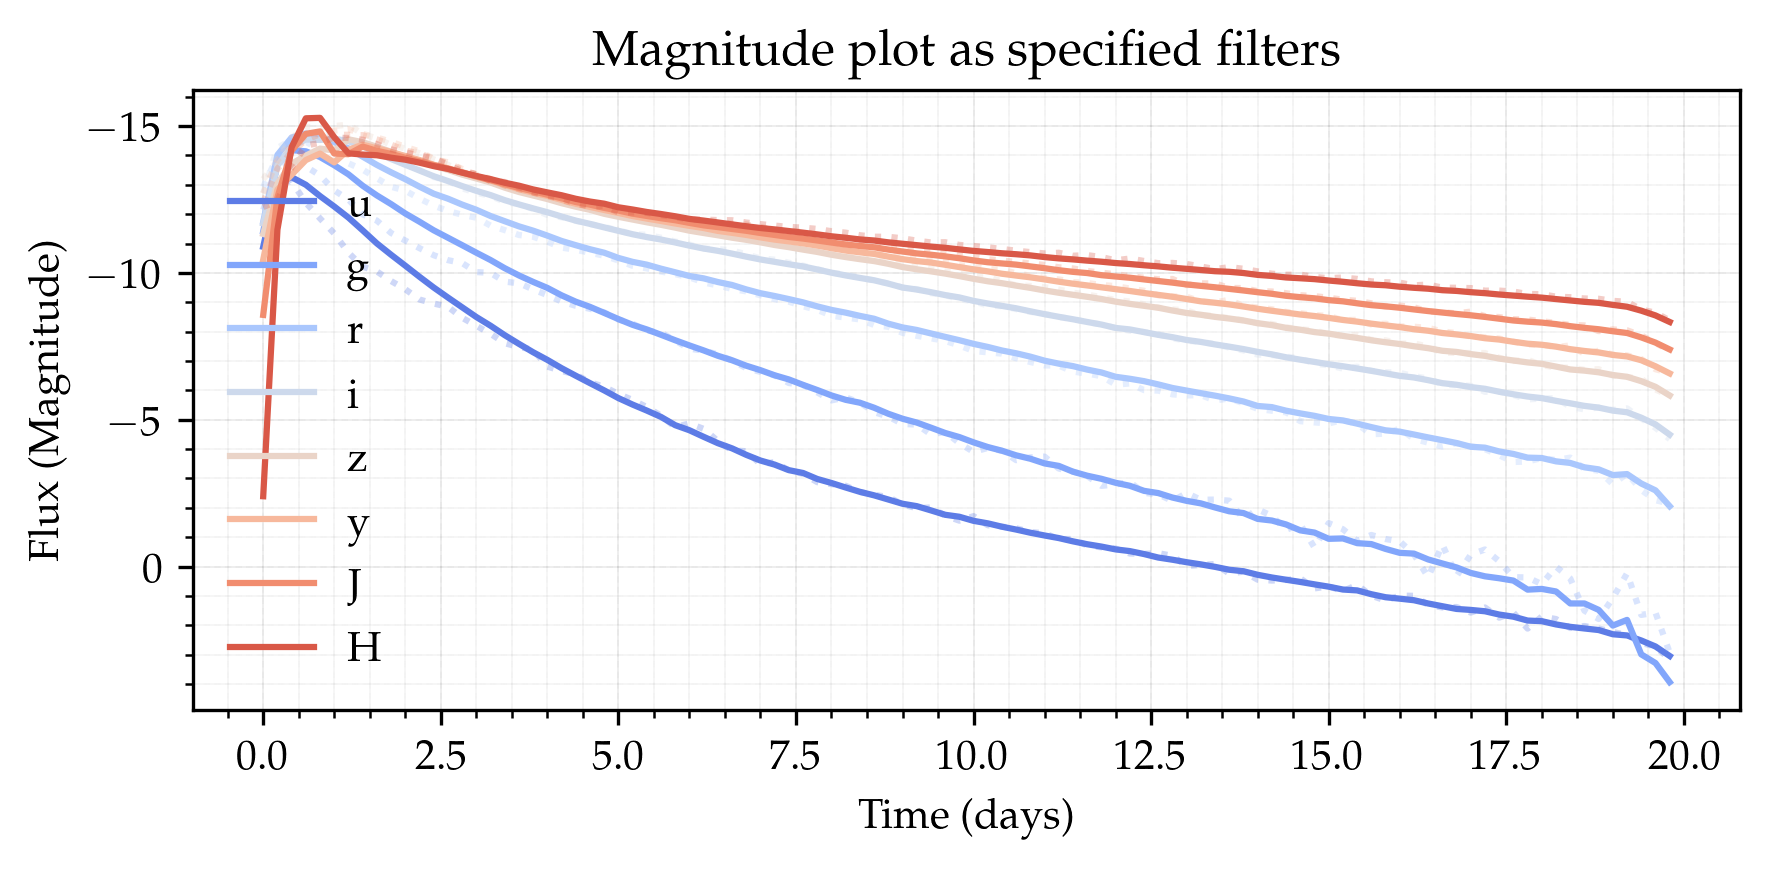

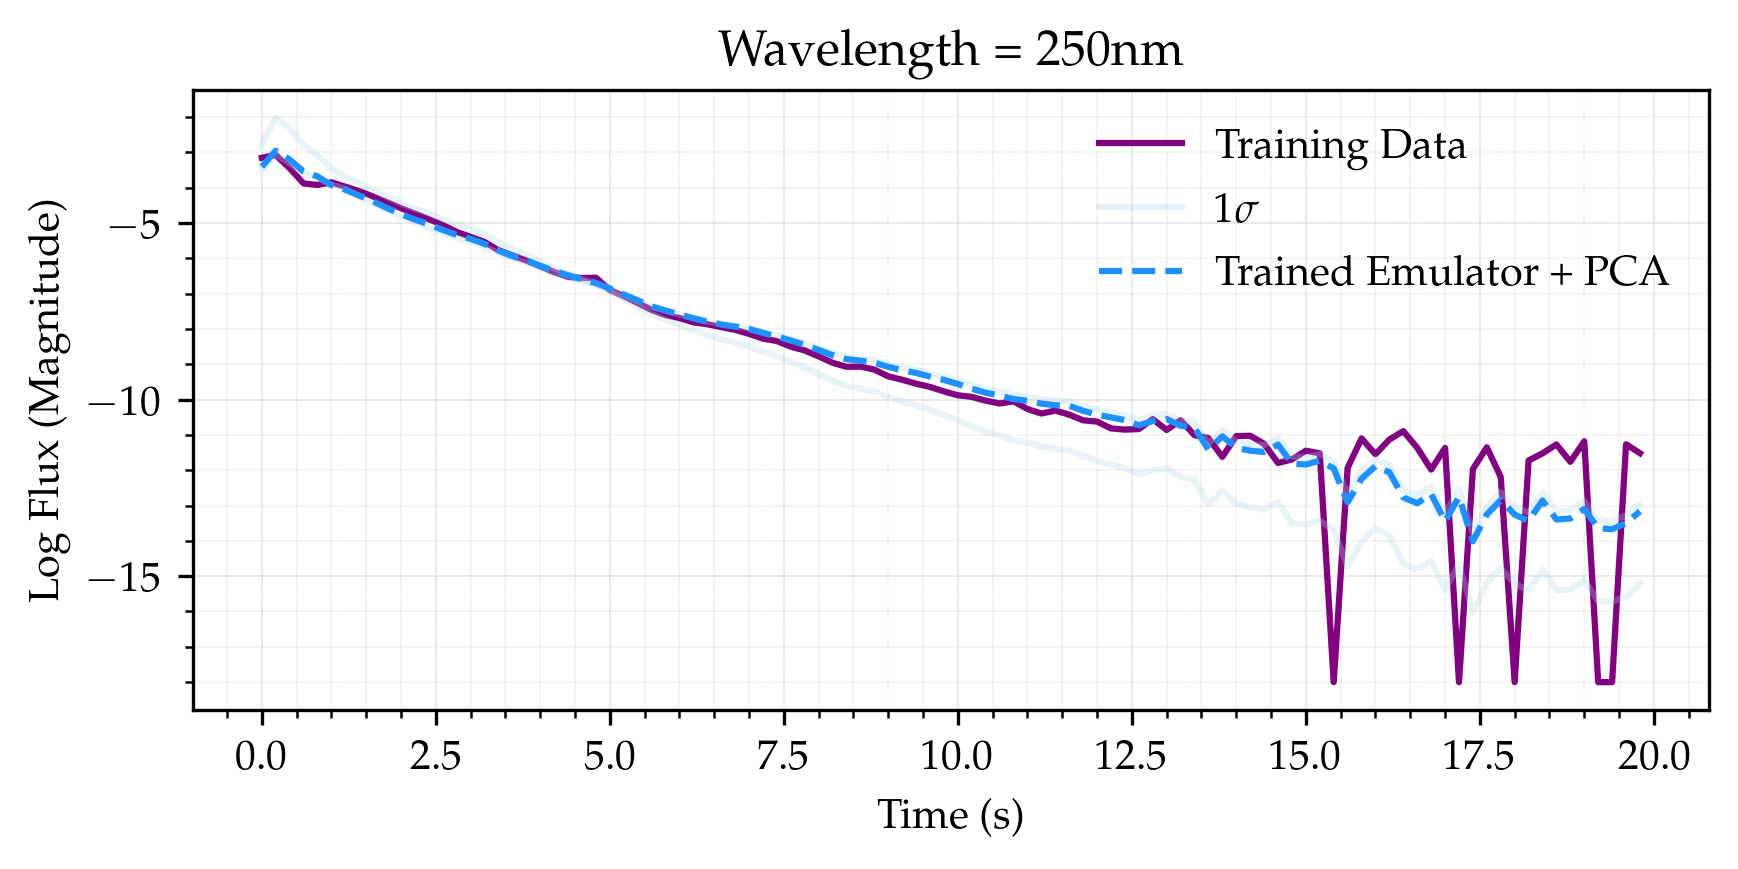

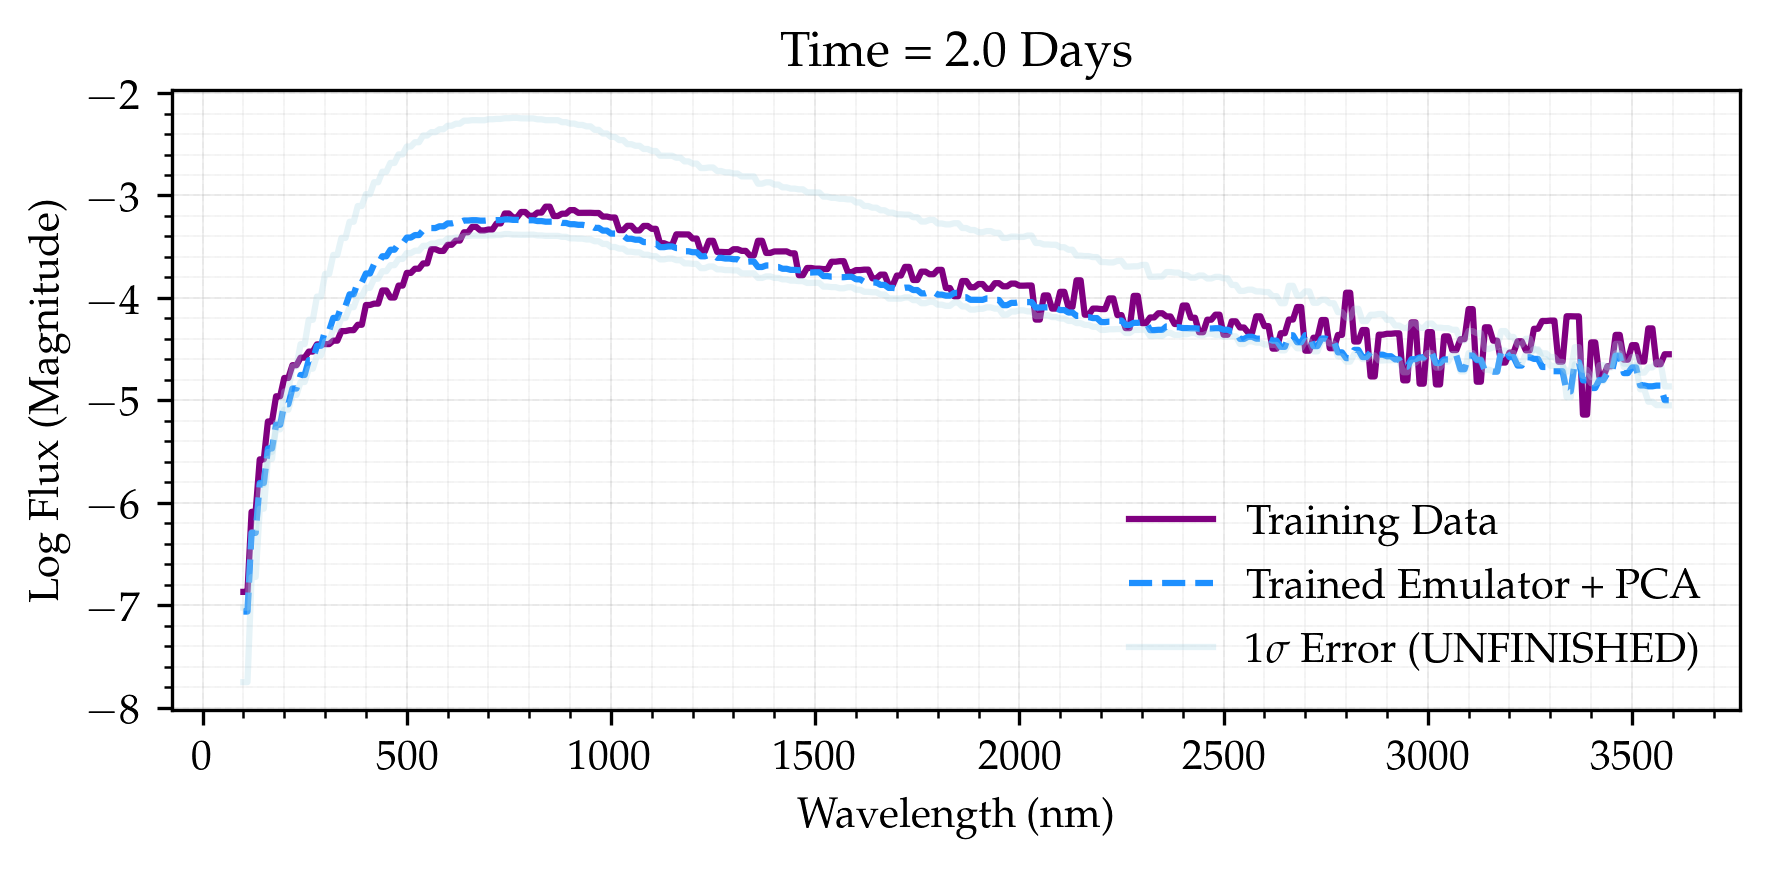

In [6]:
gp.plot_filters(mejdyn = 0.001, mejwind =  0.01, phi = 45, iobs = 4)
gp.get_flux(mejdyn = 0.001, mejwind =  0.01, phi = 45, iobs = 4, time_desired = 2, wv_desired = 250)
gp.overplot_time(mejdyn = 0.001, mejwind =  0.01, phi = 45, iobs = 4, wv_desired = 250)
gp.overplot_wavelength(mejdyn = 0.001, mejwind =  0.01, phi = 45, iobs = 4, time_desired = 2)
plt.show()

100%|██████████| 196/196 [00:05<00:00, 34.65it/s]


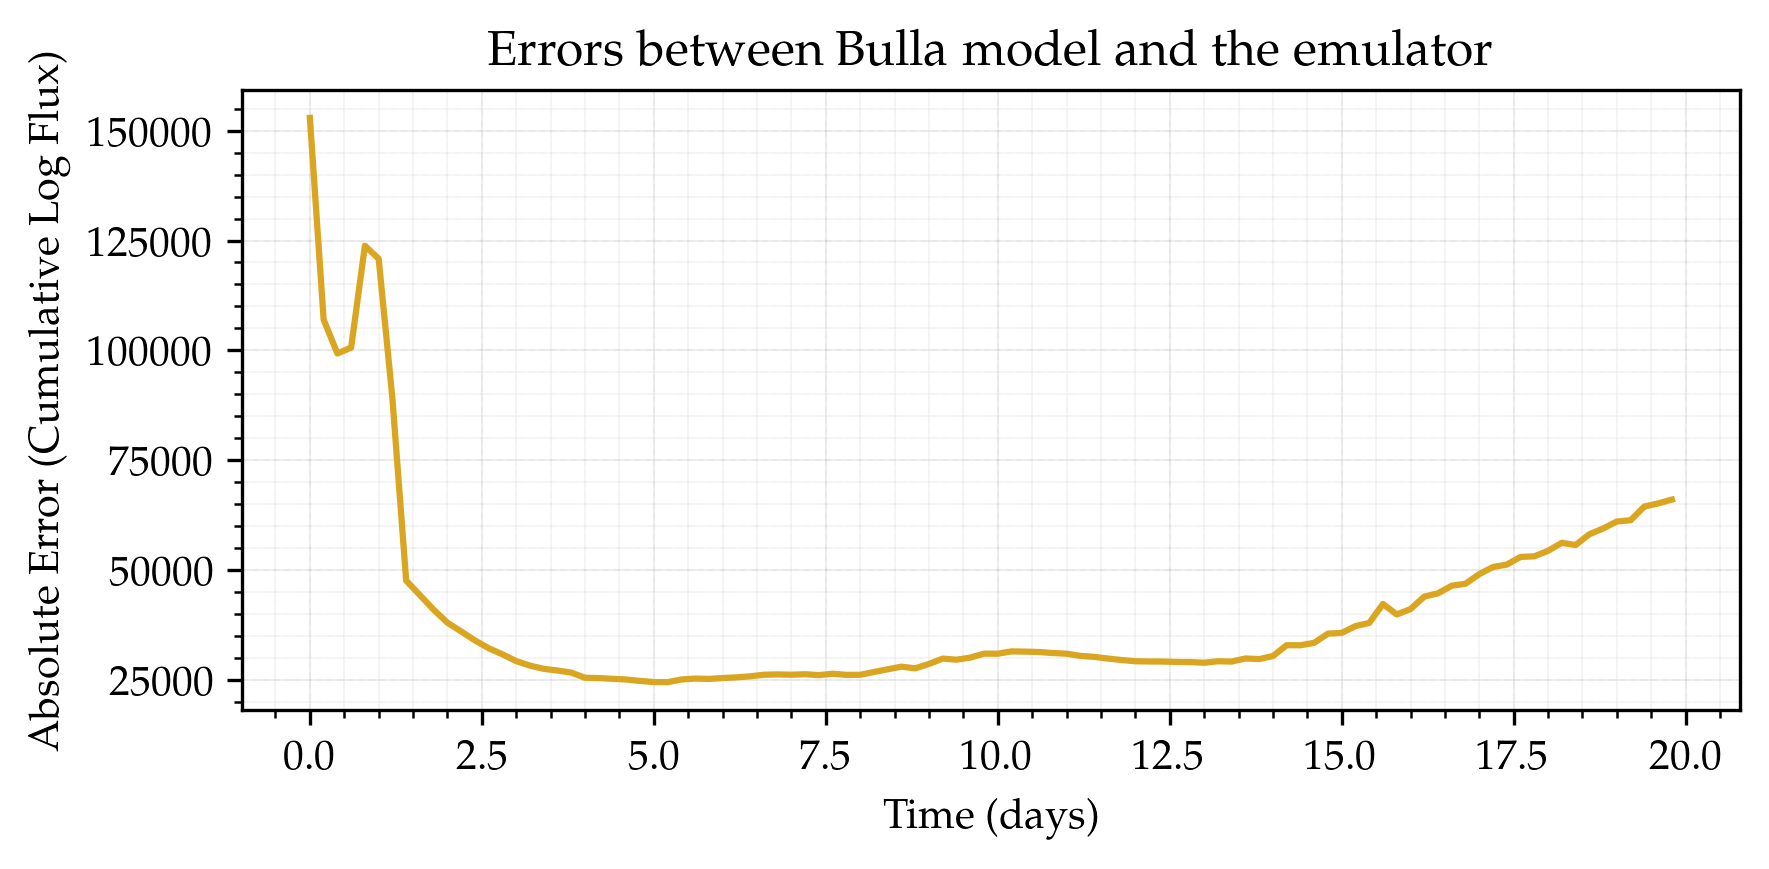

In [7]:
# Emulator Errors
# validation_element
self = gp
t = np.arange(gp.Ntime[0], gp.Ntime[1], gp.Ntime[1] / gp.Ntime[2])
diff = np.zeros(t.shape)
for index, row, in tqdm(self.reference.iterrows(), total = 196):
    for viewing_angle in self.iobs_range:
        mejdyn = row.mejdyn
        mejwind =  row.mejwind
        phi = row.phi
        iobs = viewing_angle

        untrained = np.load(f"data/pca/mejdyn{mejdyn}_mejwind{mejwind}_phi{phi}_iobs{iobs}.npy")
        trained = np.load(f"data/pcaTrained/mejdyn{mejdyn}_mejwind{mejwind}_phi{phi}_iobs{iobs}.npy")


        for i in range(len(t)):
            diff += abs(trained[:, i] - untrained[:, i])

plt.figure(dpi=300, figsize=(6, 3))
plt.plot(t, diff, color = "goldenrod")
utkarshGrid()
plt.title("Errors between Bulla model and the emulator")
# plt.ylabel("Absolute Error (Cumulative Magnitude)")
plt.ylabel("Absolute Error (Cumulative Log Flux)")
plt.xlabel("Time (days)")
plt.show()

## Single Cross Validation

In [ ]:
mejdyn = 0.001
mejwind =  0.01
phi = 45
iobs = 4
gp = GP5D("Classes/reference.csv")
gp.set_wv_range(curr_wv)
gp.n_comp = set_n_comp
time_shape = None
gp.num_pca_components = (10,10)
# gp.save_training_data(time_trauncation = time_shape) # Which wv do you want to extract.  
gp.save_pca_components(skip_factor = set_skip_factor)
gp.setXY_cross_validation(mejdyn, mejwind, phi, iobs)
fitting_kernel = GPy.kern.RBF(input_dim=4, variance = 10, lengthscale=10, ARD = True)
decay_kernel = GPy.kern.Linear(4 , ARD=True)
gp.kernel = fitting_kernel * decay_kernel
gp.model = GPy.models.GPRegression(gp.X,gp.Y,gp.kernel)
t0 = time.time()
print(f"[STATUS] Optimizing...")
gp.model.optimize_restarts(parallel = True, robust = True, num_restarts = 20)
print(f"[STATUS] {round(time.time() - t0, 2)}s taken to optimize.")
# gp.model.optimize(messages = True)
# display(gp.model.rbf.lengthscale)
display(gp.model.mul.rbf.lengthscale)
t1 = time.time()
gp.model_predict(include_like = False)
print(f"[STATUS] {round(time.time() - t1, 2)}s taken to predict.")
t2 = time.time()
gp.save_trained_data()
print(f"[STATUS] {round(time.time() - t2, 2)}s taken to save data.")

In [8]:
# gp = GP5D("Classes/reference.csv")
# gp.set_wv_range(curr_wv)
# gp.n_comp = set_n_comp
# # gp.num_pca_components = (4,4)
# # gp.save_training_data(time_trauncation = None) # Which wv do you want to extract.  
# gp.save_pca_components(skip_factor = set_skip_factor)
# gp.setXY()
# fitting_kernel = GPy.kern.RBF(input_dim=4, variance = 10, lengthscale=10, ARD = True)
# decay_kernel = GPy.kern.Linear(4,ARD=True)
# gp.kernel = fitting_kernel * decay_kernel
# gp.LOOCV_PCA()
# gp.plot_loocv_histogram() # THIS IS FOR PCA COMPONENTS, NOT TRAINING DATA

In [9]:
# gp.save_trained_data()
# gp.ComputeDifferenceFlux()
# gp.plot_difference_histogram(binning = 100)
# plt.xlim(-1, 1)